# Introdução


##Análise de Rotatividade de Funcionários

Este projeto foi desenvolvido como desafio final do Bootcamp [RE]Start da Data Girls, na trilha de Análise de Dados. O objetivo é **explorar indicadores de rotatividade (attrition) de funcionários** com base no conjunto de dados “IBM HR Analytics Attrition & Performance” e, a partir disso, **construir um dashboard interativo que auxilie a empresa fictícia Data Girls S.A. na tomada de decisões estratégicas em Recursos Humanos (RH)**.

Ao longo do projeto, serão aplicadas técnicas de análise exploratória de dados, visualizações interativas e geração de insights relevantes para responder perguntas de negócio, como:

- Qual perfil de funcionário apresenta maior risco de rotatividade?
- Quais fatores mais influenciam a decisão de saída?
- Quais setores ou cargos apresentam maior turnover?
- Existe um padrão de tempo de permanência até o desligamento?

O projeto será estruturado em cinco etapas principais:

1. Leitura e exploração inicial dos dados  
2. Limpeza e preparação do dataset  
3. Análise exploratória (EDA)  
4. Construção do dashboard interativo  
5. Geração de insights e recomendações

Este trabalho visa simular uma entrega real para área de negócios, com foco em storytelling, clareza visual e embasamento analítico.  


# 1. Carregamento e Preparação dos Dados


##1.1 Importar Bibliotecas

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

##1.2 Leitura & Exploração Inicial

In [ ]:
# Carregando a base de dados do drive
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Bootcamp (Re)Start Data Girls/RH-DATASET.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Visualizando as primeiras linhas do dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Quais colunas estão presentes, quais dados
print (df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [ ]:
#Dimensão do dataset
print(f'O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset contém 1470 linhas e 35 colunas.


In [ ]:
#Informações gerais sobre colunas e tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##1.3 Limpeza & Preparação dos Dados

In [ ]:
# Renomeando colunas para português
colunas ={
    'Age': 'Idade',
    'Attrition': 'Desligamento',
    'BusinessTravel': 'Viagem_a_Trabalho',
    'DailyRate': 'Pagamento_Diário',
    'Department': 'Departamento',
    'DistanceFromHome': 'Distancia_de_Casa',
    'Education': 'Escolaridade',
    'EducationField': 'Área_de_Formação',
    'EmployeeCount': 'Total_de_Funcionarios',
    'EmployeeNumber': 'ID_Funcionario',
    'EnvironmentSatisfaction': 'Satisfacao_Ambiental',
    'Gender': 'Gênero',
    'HourlyRate': 'Pagamento_Por_Hora',
    'JobInvolvement': 'Envolvimento_no_Trabalho',
    'JobLevel': 'Nivel_do_Cargo',
    'JobRole': 'Cargo',
    'JobSatisfaction': 'Satisfacao_no_Trabalho',
    'MaritalStatus': 'Estado_Civil',
    'MonthlyIncome': 'Renda_Mensal',
    'MonthlyRate': 'Pagamento_Mensal',
    'NumCompaniesWorked': 'Num_Empresas_Anteriores',
    'OverTime': 'Horas_Extras',
    'PercentSalaryHike': 'Percentual_de_Aumento_Salarial',
    'PerformanceRating': 'Desempenho',
    'RelationshipSatisfaction': 'Satisfacao_Relacionamento',
    'StandardHours': 'Horas_Padrão',
    'StockOptionLevel': 'Nivel_de_Ações',
    'TotalWorkingYears': 'Anos_de_Carreira',
    'TrainingTimesLastYear': 'Treinamentos_no_Ultimo_Ano',
    'WorkLifeBalance': 'Equilibrio_Vida_Trabalho',
    'YearsAtCompany': 'Anos_na_Empresa',
    'YearsInCurrentRole': 'Anos_no_Cargo_Atual',
    'YearsSinceLastPromotion': 'Anos_desde_Ultima_Promocao',
    'YearsWithCurrManager': 'Anos_com_Gestor_Atual'
}
df = df.rename(columns =colunas)
df.head()

,Idade,Desligamento,Viagem_a_Trabalho,Pagamento_Diário,Departamento,Distancia_de_Casa,Escolaridade,Área_de_Formação,Total_de_Funcionarios,ID_Funcionario,...,Satisfacao_Relacionamento,Horas_Padrão,Nivel_de_Ações,Anos_de_Carreira,Treinamentos_no_Ultimo_Ano,Equilibrio_Vida_Trabalho,Anos_na_Empresa,Anos_no_Cargo_Atual,Anos_desde_Ultima_Promocao,Anos_com_Gestor_Atual
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
#Verificando se há linhas duplicadas
df.duplicated().sum()

np.int64(0)

In [ ]:
#Verificando valores ausentes
df.isnull().sum()

,0
Idade,0
Desligamento,0
Viagem_a_Trabalho,0
Pagamento_Diário,0
Departamento,0
Distancia_de_Casa,0
Escolaridade,0
Área_de_Formação,0
Total_de_Funcionarios,0
ID_Funcionario,0


In [ ]:
# Quantidade de valores de cada coluna (junta os que são iguais)
print(df.nunique())

Idade                               43
Desligamento                         2
Viagem_a_Trabalho                    3
Pagamento_Diário                   886
Departamento                         3
Distancia_de_Casa                   29
Escolaridade                         5
Área_de_Formação                     6
Total_de_Funcionarios                1
ID_Funcionario                    1470
Satisfacao_Ambiental                 4
Gênero                               2
Pagamento_Por_Hora                  71
Envolvimento_no_Trabalho             4
Nivel_do_Cargo                       5
Cargo                                9
Satisfacao_no_Trabalho               4
Estado_Civil                         3
Renda_Mensal                      1349
Pagamento_Mensal                  1427
Num_Empresas_Anteriores             10
Over18                               1
Horas_Extras                         2
Percentual_de_Aumento_Salarial      15
Desempenho                           2
Satisfacao_Relacionamento

In [ ]:
#Remove a coluna Total_de_Funcionarios e Horas_Padrão , pois as colunas não têm variação ou não agregam valor para análise
df.drop(columns=['ID_Funcionario','Total_de_Funcionarios', 'Horas_Padrão', 'Over18'], inplace=True)

In [ ]:
df.shape

(1470, 31)

In [ ]:
#Variáveis Categóricas
df.select_dtypes(include='object')

,Desligamento,Viagem_a_Trabalho,Departamento,Área_de_Formação,Gênero,Cargo,Estado_Civil,Horas_Extras
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [ ]:
# Padronizando a coluna 'Desligamento' (Yes/No -> Sim/Não)
df['Desligamento'] = df['Desligamento'].map({'Yes': 'Sim', 'No': 'Não'})

In [ ]:
#Criando uma versão binária da coluna 'Desligamento' (Sim -> 1, Não -> 0)
df['Desligamento_binario'] = df['Desligamento'].map({'Sim': 1, 'Não': 0})

In [ ]:
#Criando uma versão binária da coluna Horas extras (Sim -> 1, Não -> 0)
df['Horas_Extras_binario'] = df['Horas_Extras'].map({'Yes': 1, 'No': 0})

In [ ]:
#Identificando colunas categóricas
colunas_categoricas = ['Gênero', 'Estado_Civil', 'Escolaridade',
                       'Área_de_Formação', 'Cargo', 'Departamento',
                       'Viagem_a_Trabalho', 'Horas_Extras', 'Desligamento']

#Convertendo essas colunas para o tipo 'category'
for col in colunas_categoricas:
    df[col] = df[col].astype('category')

## 1.4 Estatísticas descritivas iniciais

In [ ]:
#Estatísticas descritivas iniciais
df.describe(include='all')

,Idade,Desligamento,Viagem_a_Trabalho,Pagamento_Diário,Departamento,Distancia_de_Casa,Escolaridade,Área_de_Formação,Satisfacao_Ambiental,Gênero,...,Nivel_de_Ações,Anos_de_Carreira,Treinamentos_no_Ultimo_Ano,Equilibrio_Vida_Trabalho,Anos_na_Empresa,Anos_no_Cargo_Atual,Anos_desde_Ultima_Promocao,Anos_com_Gestor_Atual,Desligamento_binario,Horas_Extras_binario
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.0,1470,1470.000000,1470,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,5.0,6,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Não,Travel_Rarely,NaN,Research & Development,NaN,3.0,Life Sciences,NaN,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,572.0,606,NaN,882,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,NaN,NaN,2.721769,NaN,...,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224,0.282993
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,NaN,NaN,1.093082,NaN,...,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863,0.450606
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,NaN,NaN,2.000000,NaN,...,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,NaN,NaN,3.000000,NaN,...,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,0.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,NaN,NaN,4.000000,NaN,...,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000,1.000000


In [ ]:
#Estatísticas descritivas das colunas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
Pagamento_Diário,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
Distancia_de_Casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Satisfacao_Ambiental,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
Pagamento_Por_Hora,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
Envolvimento_no_Trabalho,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
Nivel_do_Cargo,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
Satisfacao_no_Trabalho,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
Renda_Mensal,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0
Pagamento_Mensal,1470.0,14313.103401,7117.786044,2094.0,8047.0,14235.5,20461.50,26999.0


#### Estatísticas Descritivas

 Algumas observações importantes:

- A maioria dos funcionários tem entre 30 e 43 anos.
- A renda mensal é bastante desigual, com valores que variam de R$ 1.009 a 19.999.
- A distância de casa é um fator potencialmente influente, com valores que chegam a 29 km.
- A maior parte dos colaboradores está na empresa há menos de 6 anos.
- Há poucos treinamentos por ano e promoções relativamente espaçadas.

# 2. Análise Exploratória (EDA)

##2.1 Taxa geral de desligamento

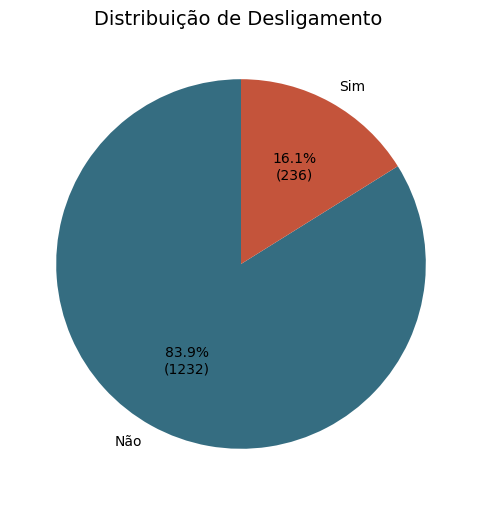

In [ ]:
default_div = sns.diverging_palette(220, 20, n=7)
# Contagem dos desligamentos
deslig_counts = df['Desligamento'].value_counts()
cores = ['#356d81', '#c4543b']
# Criando o gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(
    deslig_counts,
    labels=deslig_counts.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*deslig_counts.sum()/100)})',
    startangle=90,
    colors=cores
)

plt.title('Distribuição de Desligamento ', fontsize=14)
plt.show()

<font color='#356d81'>***Insight Taxa Geral: 16% dos funcionários se desligaram da empresa, um índice relevante que merece atenção.***



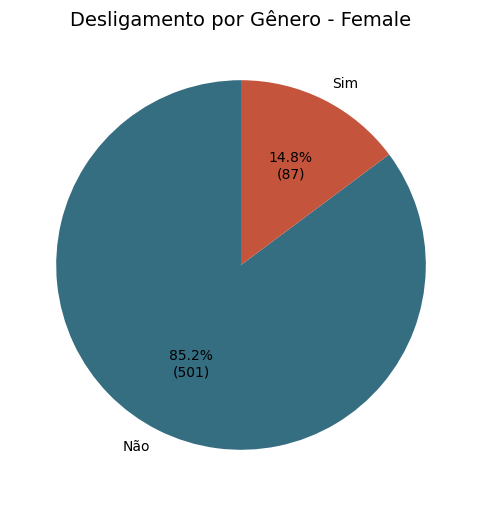

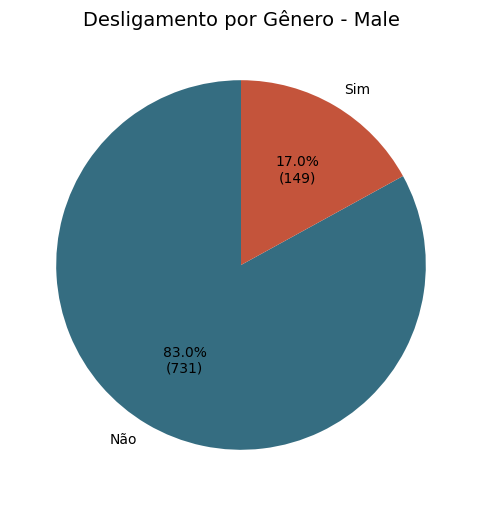

In [ ]:
# Fazendo uma tabela cruzada (gênero x desligamento)
genero_deslig = pd.crosstab(df['Gênero'], df['Desligamento'])

# Gerar gráfico de pizza para cada gênero
for genero in genero_deslig.index:
    plt.figure(figsize=(6,6))
    valores = genero_deslig.loc[genero]
    plt.pie(
        valores,
        labels=valores.index,
        autopct=lambda p: f'{p:.1f}%\n({int(p*valores.sum()/100)})',
        startangle=90,
         colors=cores
    )
    plt.title(f'Desligamento por Gênero - {genero}', fontsize=14)
    plt.show()


##2.2 Perfil dos desligados


In [ ]:
#Media da idade das pessoas que se desligam
df[df['Desligamento'] == 'Sim']['Idade'].mean()

np.float64(33.607594936708864)

In [ ]:
# Criar faixas etárias
df['Faixa_Idade'] = pd.cut(df['Idade'],
                           bins=[17,25,35,45,60],
                           labels=['18-25','26-35','36-45','46+'])

# Calcular % de desligamento em cada faixa
taxa_por_idade = df.groupby('Faixa_Idade')['Desligamento_binario'].mean() * 100
print(taxa_por_idade)


Faixa_Idade
18-25    35.772358
26-35    19.141914
36-45     9.188034
46+      12.454212
Name: Desligamento_binario, dtype: float64


/tmp/ipython-input-1763586945.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_por_idade = df.groupby('Faixa_Idade')['Desligamento_binario'].mean() * 100


/tmp/ipython-input-2911720106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_por_idade.index, y=taxa_por_idade.values, palette=default_div)
/tmp/ipython-input-2911720106.py:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(x=taxa_por_idade.index, y=taxa_por_idade.values, palette=default_div)


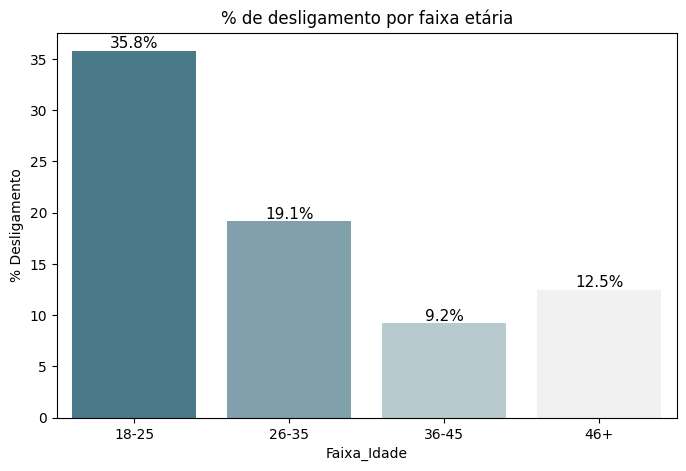

In [ ]:
#Porcentagem de desligamento por faixa etária
plt.figure(figsize=(8,5))
ax = sns.barplot(x=taxa_por_idade.index, y=taxa_por_idade.values, palette=default_div)
plt.title('% de desligamento por faixa etária')
plt.ylabel('% Desligamento')

for p in ax.patches:
    valor = p.get_height()
    ax.annotate(f'{valor:.1f}%',
                (p.get_x() + p.get_width()/2., valor),
                ha='center', va='bottom', fontsize=11)

plt.show()

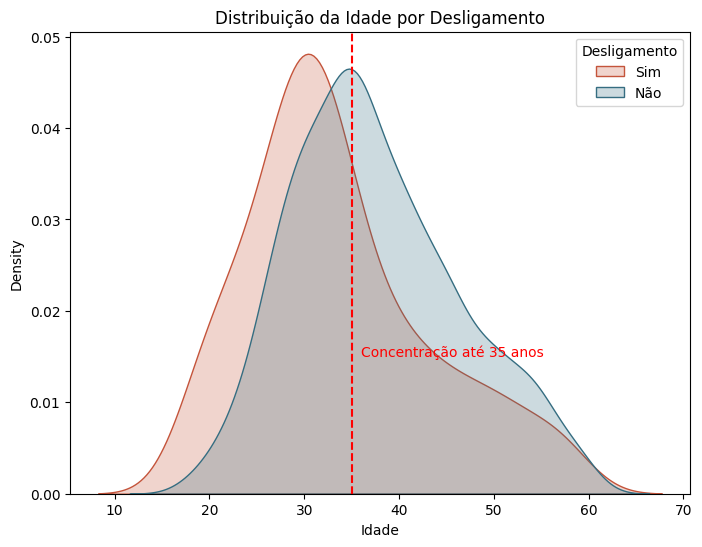

In [ ]:
#Idade x Desligamento
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['Desligamento'] == 'Sim'], x='Idade', fill=True, color='#c4543b', label='Sim')
sns.kdeplot(data=df[df['Desligamento'] == 'Não'], x='Idade', fill=True, color='#356d81', label='Não')

plt.axvline(x=35, color='red', linestyle='--')
plt.text(36, 0.015, 'Concentração até 35 anos', color='red')

plt.title('Distribuição da Idade por Desligamento')
plt.legend(title='Desligamento')
plt.show()


<font color='#356d81'> ***Idade: O numero de desligamentos é maior entre os funcionários mais jovens.Maior concentração de desligados em colaboradores com até 35 anos.***

/tmp/ipython-input-105938094.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Desligamento', y='Distancia_de_Casa', palette=cores)


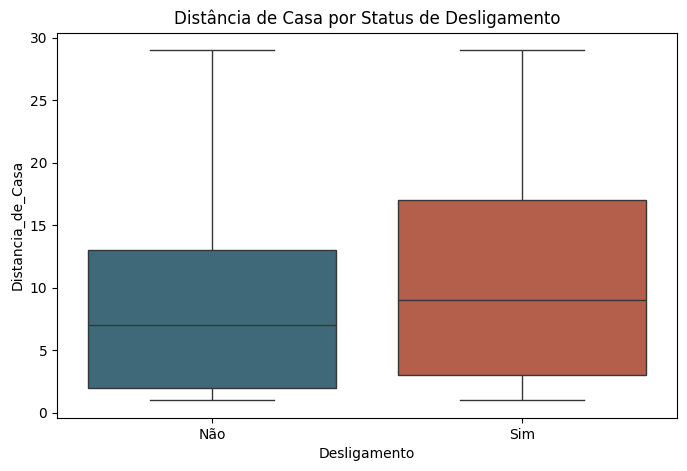

In [ ]:
#Distância de Casa x Desligamento
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Desligamento', y='Distancia_de_Casa', palette=cores)
plt.title('Distância de Casa por Status de Desligamento')
plt.show()

<font color='#356d81'> ***Distância da casa: Colaboradores que moram mais longe têm maior propensão ao desligamento.***

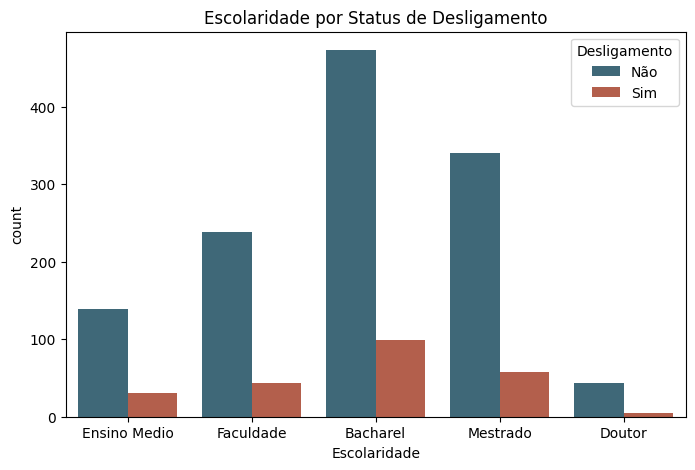

In [ ]:
#Escolaridade x Desligamento
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Escolaridade', hue='Desligamento', palette=cores)
plt.title('Escolaridade por Status de Desligamento')
plt.xticks([0, 1, 2, 3, 4] ,['Ensino Medio','Faculdade','Bacharel','Mestrado', 'Doutor'])
plt.show()

<font color='#356d81'> ***Escolaridade:
Escolaridade não mostra influência relevante.***

/tmp/ipython-input-2529370173.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_estado_civil = (df.groupby('Estado_Civil')['Desligamento_binario']
/tmp/ipython-input-2529370173.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taxa_estado_civil.index, y=taxa_estado_civil.values, palette=default_div)
/tmp/ipython-input-2529370173.py:6: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(x=taxa_estado_civil.index, y=taxa_estado_civil.values, palette=default_div)


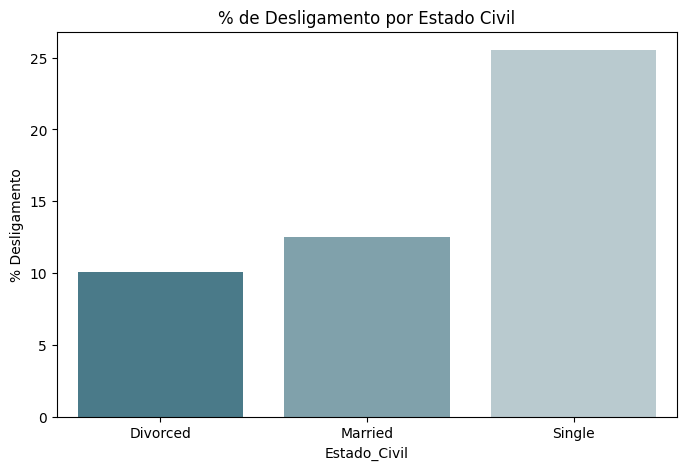

In [ ]:
#Estado Civil x % Desligamento
taxa_estado_civil = (df.groupby('Estado_Civil')['Desligamento_binario']
                     .mean() * 100)

plt.figure(figsize=(8,5))
sns.barplot(x=taxa_estado_civil.index, y=taxa_estado_civil.values, palette=default_div)
plt.title('% de Desligamento por Estado Civil')
plt.ylabel('% Desligamento')
plt.show()


<font color='#356d81'> *** Estado civil:
Solteiros têm maior propensão ao desligamento.***

In [ ]:
# Cálculo da taxa de desligamento por nível de satisfação
taxa_satisfacao = df.groupby('Satisfacao_no_Trabalho')['Desligamento_binario'].mean() * 100
print(taxa_satisfacao)

Satisfacao_no_Trabalho
1    22.837370
2    16.428571
3    16.515837
4    11.328976
Name: Desligamento_binario, dtype: float64


/tmp/ipython-input-3472365011.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_satisfacao.index, y=taxa_satisfacao.values, palette=default_div, ax=axes[1])
/tmp/ipython-input-3472365011.py:8: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(x=taxa_satisfacao.index, y=taxa_satisfacao.values, palette=default_div, ax=axes[1])


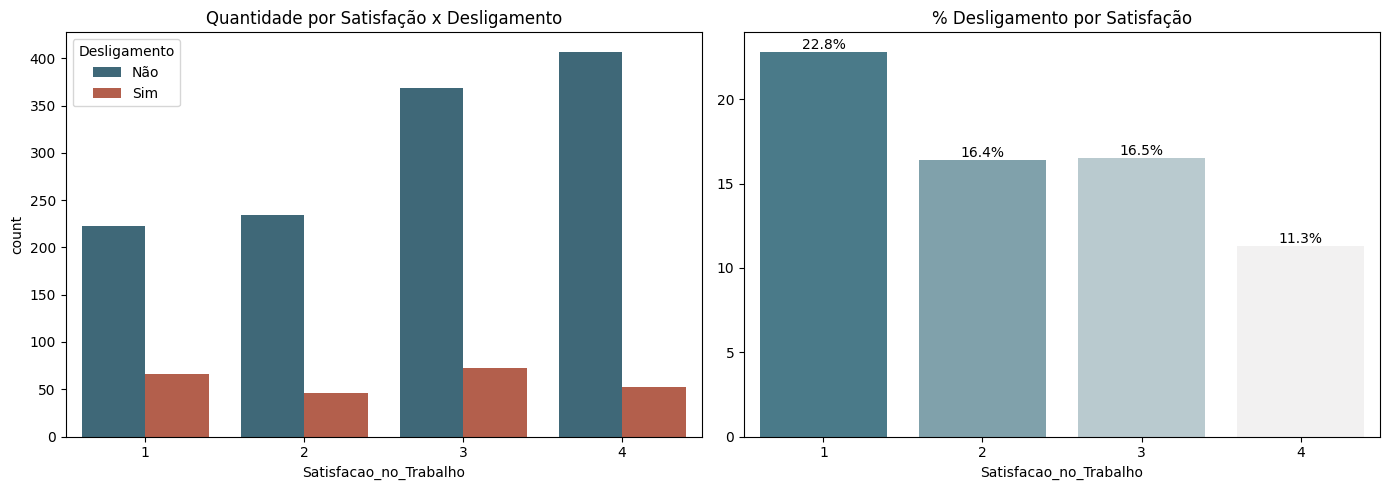

In [ ]:
#Desligamento por Satisfação
fig, axes = plt.subplots(1,2, figsize=(14,5))
# Absoluto
sns.countplot(data=df, x='Satisfacao_no_Trabalho', hue='Desligamento', palette=cores , ax=axes[0])
axes[0].set_title('Quantidade por Satisfação x Desligamento')

# Percentual
ax = sns.barplot(x=taxa_satisfacao.index, y=taxa_satisfacao.values, palette=default_div, ax=axes[1])
axes[1].set_title('% Desligamento por Satisfação')

for p in ax.patches:
    axes[1].annotate(f'{p.get_height():.1f}%',
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom')

plt.tight_layout()
plt.show()


<font color='#356d81'> ***Satisfação:
Funcionários com baixa satisfação no trabalho têm até 3x mais chance de se desligar do que aqueles com satisfação alta ou muito alta.***


## 2.3 Fatores influentes


/tmp/ipython-input-3495002721.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abs_horas = df.groupby(['Horas_Extras', 'Desligamento']).size().unstack(fill_value=0)


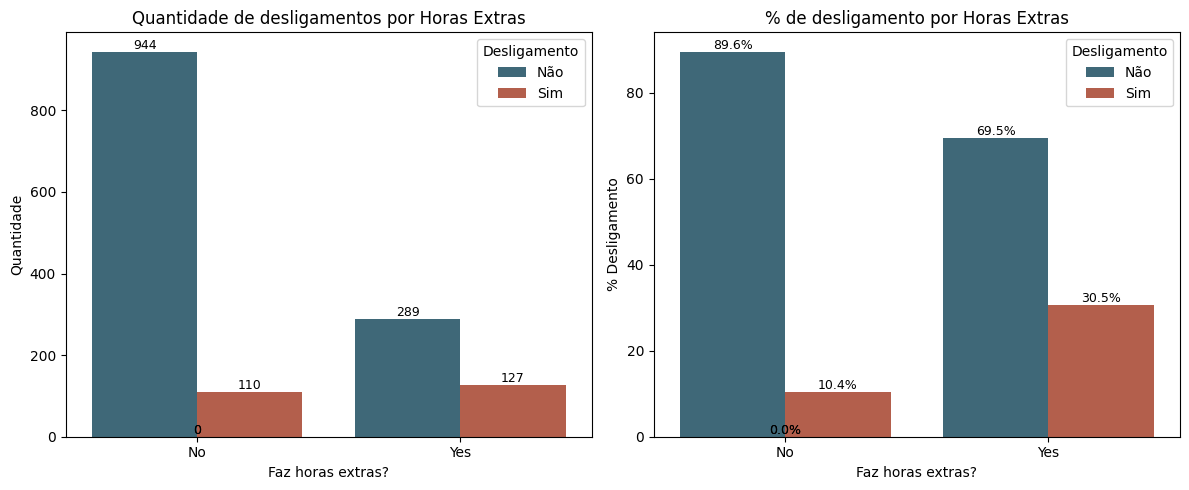

In [ ]:
#Horas extras
# Agrupa dados absolutos
abs_horas = df.groupby(['Horas_Extras', 'Desligamento']).size().unstack(fill_value=0)

# Calcula percentuais
pct_horas = abs_horas.div(abs_horas.sum(axis=1), axis=0) * 100

fig = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(1,2, width_ratios=[1,1])

# Gráfico 1: valores absolutos
ax0 = plt.subplot(gs[0])
sns.countplot(
    data=df,
    x='Horas_Extras',
    hue='Desligamento',
    palette=cores,
    ax=ax0
)
ax0.set_title('Quantidade de desligamentos por Horas Extras')
ax0.set_xlabel('Faz horas extras?')
ax0.set_ylabel('Quantidade')

# Adiciona valores nas barras
for p in ax0.patches:
    ax0.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=9)

# Gráfico 2: percentual
ax1 = plt.subplot(gs[1])

# Prepara DataFrame para plotar os percentuais
pct_plot = pct_horas.reset_index().melt(id_vars='Horas_Extras', var_name='Desligamento', value_name='Percentual')

sns.barplot(
    data=pct_plot,
    x='Horas_Extras',
    y='Percentual',
    hue='Desligamento',
    palette=cores,
    ax=ax1
)
ax1.set_title('% de desligamento por Horas Extras')
ax1.set_xlabel('Faz horas extras?')
ax1.set_ylabel('% Desligamento')

# Adiciona os valores nas barras
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<font color='#356d81'> ***Horas Extras:
Em números absolutos, pode não parecer tão grande, mas no gráfico percentual fica evidente que colaboradores que fazem horas extras têm uma taxa de desligamento 3x maior.***

In [ ]:
#Renda média de desligados e ativos
media_desligados = df[df['Desligamento']=='Sim']['Renda_Mensal'].mean()
media_ativos = df[df['Desligamento']=='Não']['Renda_Mensal'].mean()

print(f"Renda média desligados: {media_desligados:.2f}")
print(f"Renda média ativos: {media_ativos:.2f}")


Renda média desligados: 4787.09
Renda média ativos: 6832.74


In [ ]:
# Faixa de renda mais crítica
df['Faixa_Renda'] = pd.cut(df['Renda_Mensal'],
                           bins=4,
                           labels=['Baixa','Média-baixa','Média-alta','Alta'])

taxa_renda = df.groupby('Faixa_Renda')['Desligamento_binario'].mean()*100
print(taxa_renda)


Faixa_Renda
Baixa          19.661017
Média-baixa    14.201183
Média-alta      8.695652
Alta            3.787879
Name: Desligamento_binario, dtype: float64


/tmp/ipython-input-159015953.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_renda = df.groupby('Faixa_Renda')['Desligamento_binario'].mean()*100


/tmp/ipython-input-1958437709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_renda.index, y=taxa_renda.values, palette=default_div)
/tmp/ipython-input-1958437709.py:3: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(x=taxa_renda.index, y=taxa_renda.values, palette=default_div)


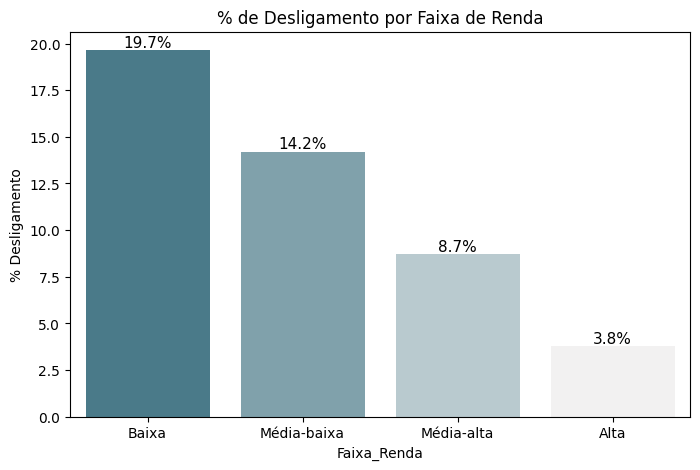

In [ ]:
#Desligamento por faixa de renda
plt.figure(figsize=(8,5))
ax = sns.barplot(x=taxa_renda.index, y=taxa_renda.values, palette=default_div)
plt.title('% de Desligamento por Faixa de Renda')
plt.ylabel('% Desligamento')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


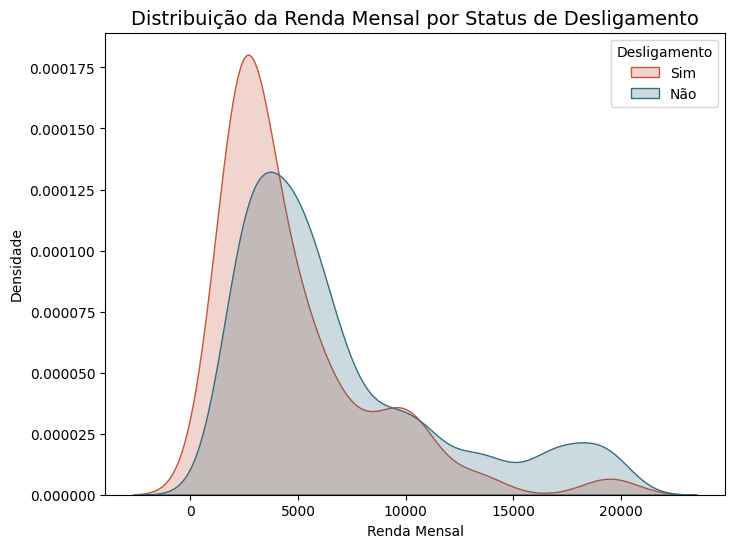

In [ ]:
# Distribuição de Renda Mensal - quem saiu (Sim)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Desligamento'] == 'Sim'],
            x='Renda_Mensal', fill=True, color='#c4543b', label='Sim')

# Distribuição de Renda Mensal - quem ficou (Não)
sns.kdeplot(data=df[df['Desligamento'] == 'Não'],
            x='Renda_Mensal', fill=True, color='#356d81', label='Não')

plt.title('Distribuição da Renda Mensal por Status de Desligamento', fontsize=14)
plt.xlabel('Renda Mensal')
plt.ylabel('Densidade')
plt.legend(title='Desligamento')
plt.show()


<font color='#356d81'> ***Renda:
A Renda média desligados: 4787.09 e renda média ativos: 6832.74.
Colaboradores na faixa de renda mais baixa têm taxa de desligamento 5x maior do que os de renda alta.
Isso sugere que remuneração é um fator crítico na retenção de talentos.
Funcionários desligados concentram-se em faixas de renda mais baixas.***

Faixa_Tempo_Empresa
0-3 anos     24.882629
4-6 anos     12.827225
7-10 anos    12.365591
10+ anos      8.130081
Name: Desligamento_binario, dtype: float64


/tmp/ipython-input-1829484944.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_tempo = df.groupby('Faixa_Tempo_Empresa')['Desligamento_binario'].mean() * 100
/tmp/ipython-input-1829484944.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=taxa_tempo.index, y=taxa_tempo.values, palette=default_div)
/tmp/ipython-input-1829484944.py:11: UserWarning: The palette list has more values (7) than needed (4), which may not be intended.
  ax = sns.barplot(x=taxa_tempo.index, y=taxa_tempo.values, palette=default_div)


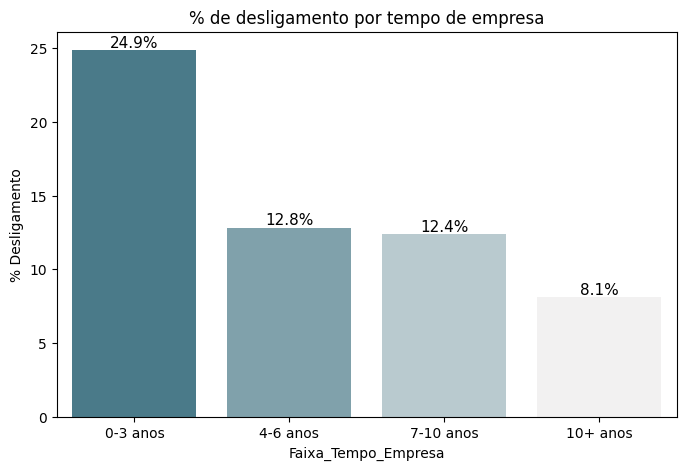

In [ ]:
#Porcentagem de desligamento por Tempro de empresa
df['Faixa_Tempo_Empresa'] = pd.cut(
    df['Anos_na_Empresa'],
    bins=[0, 3, 6, 10, 40],  # faixas de tempo
    labels=['0-3 anos', '4-6 anos', '7-10 anos', '10+ anos']
)
taxa_tempo = df.groupby('Faixa_Tempo_Empresa')['Desligamento_binario'].mean() * 100
print(taxa_tempo)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=taxa_tempo.index, y=taxa_tempo.values, palette=default_div)
plt.title('% de desligamento por tempo de empresa')
plt.ylabel('% Desligamento')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.show()


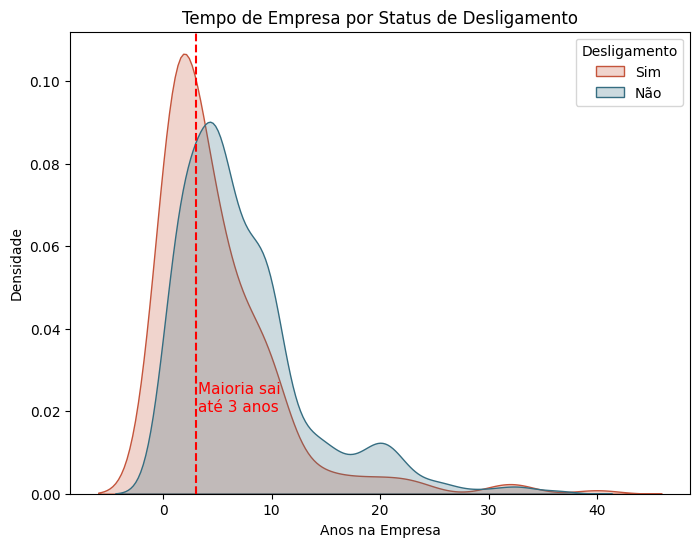

In [ ]:
#Tempo na empresa x Desligamento

plt.figure(figsize=(8,6))

# Gráfico KDE
sns.kdeplot(data=df[df['Desligamento'] == 'Sim'],
            x='Anos_na_Empresa', fill=True, color='#c4543b', label='Sim')
sns.kdeplot(data=df[df['Desligamento'] == 'Não'],
            x='Anos_na_Empresa', fill=True, color='#356d81', label='Não')

plt.title('Tempo de Empresa por Status de Desligamento')
plt.xlabel('Anos na Empresa')
plt.ylabel('Densidade')

# Adiciona linha de referência nos 3 anos
plt.axvline(x=3, color='red', linestyle='--', linewidth=1.5)

# Adiciona texto explicativo
plt.text(3.2, 0.02, 'Maioria sai\naté 3 anos', color='red', fontsize=11)

plt.legend(title='Desligamento')
plt.show()


<font color='#356d81'> ***Tempo de empresa:
Quanto menor o tempo de empresa, maior a taxa de desligamento.
O período crítico são os primeiros 3 anos, onde a taxa de saída pode ser até 3x maior que a de colaboradores mais antigos.***



/tmp/ipython-input-726736241.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cruzamento = (df.groupby(['Faixa_Renda','Horas_Extras','Faixa_Tempo_Empresa'])['Desligamento_binario']


<Axes: xlabel='Faixa_Tempo_Empresa', ylabel='Faixa_Renda-Horas_Extras'>

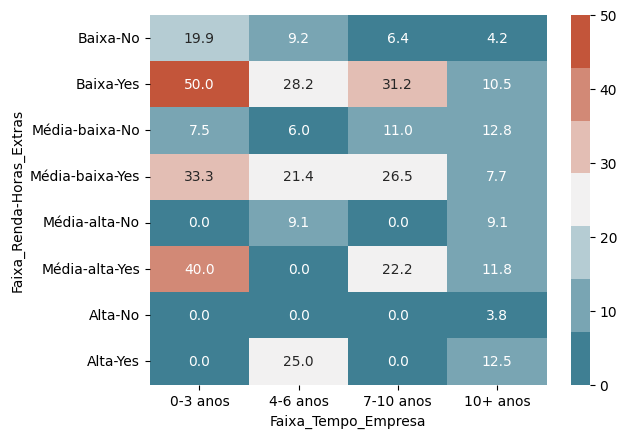

In [ ]:
 # O cruzamento das três variáveis (Faixa_Renda x Horas_Extras x Faixa_Tempo_Empresa
cruzamento = (df.groupby(['Faixa_Renda','Horas_Extras','Faixa_Tempo_Empresa'])['Desligamento_binario']
                .mean() * 100).unstack()
sns.heatmap(cruzamento, annot=True, cmap=default_div, fmt=".1f")


<font color='#356d81'> **Cruzamentos dos fatores influentes:  
O cruzamento de Faixa de Renda x Horas Extras x Tempo de Empresa** mostra que:  
 **Impacto Avassalador das Horas Extras:** Funcionários que realizam **horas extras ('Sim')** têm uma taxa de rotatividade consistentemente e significativamente **mais alta** em quase todos os cenários de renda e tempo de empresa, comparado àqueles que não fazem ('Não'). Este é o maior gatilho identificado.
 Funcionários de **baixa renda**, que **fazem horas extras** e têm **até 3 anos de empresa** apresentam a maior taxa de desligamento: **50%**.  
 O risco também é alto para colaboradores de **renda média-baixa + horas extras** (33,3%) e **média-alta + horas extras** (40%) nos primeiros anos.   
Isso evidencia que a **combinação de baixa renda + sobrecarga + pouco tempo de empresa** multiplica a probabilidade de desligamento.


## 2.4 Análise por Departamento e Cargos

/tmp/ipython-input-330785827.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_departamento = df.groupby('Departamento')['Desligamento_binario'].mean() * 100
/tmp/ipython-input-330785827.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-330785827.py:34: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.barplot(


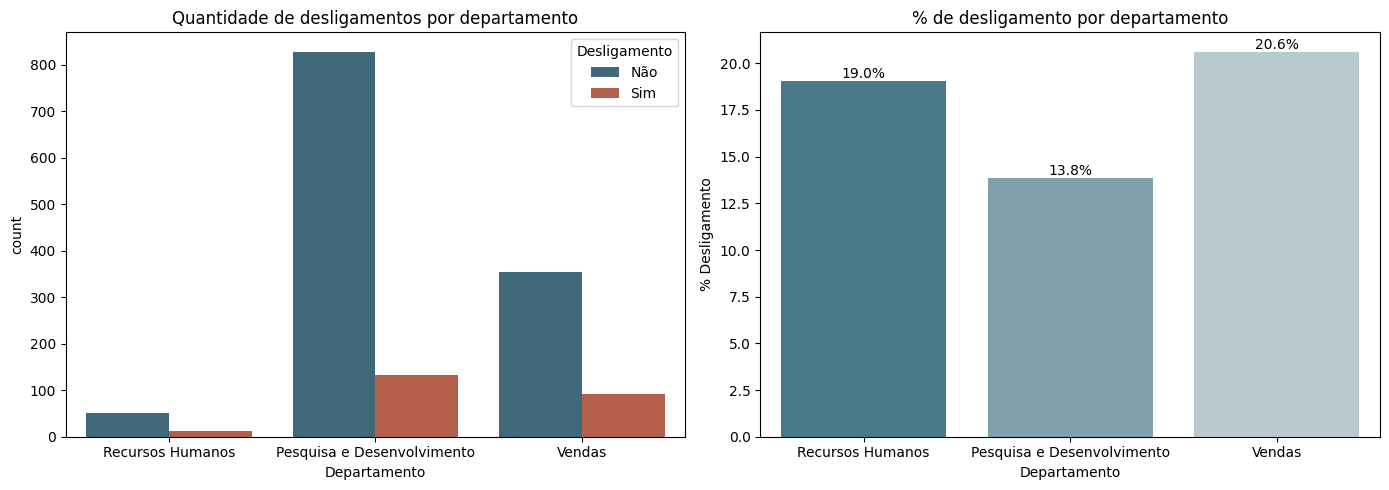

In [ ]:
from matplotlib import gridspec

# Contagem absoluta por departamento
abs_departamento = df['Departamento'].value_counts()

# Percentual por departamento
taxa_departamento = df.groupby('Departamento')['Desligamento_binario'].mean() * 100

# Tradução
traducao_departamentos = {
    'Sales': 'Vendas',
    'Research & Development': 'Pesquisa e Desenvolvimento',
    'Human Resources': 'Recursos Humanos'
}

# Gráficos lado a lado
fig = plt.figure(figsize=(14,5))
gs = gridspec.GridSpec(1,2, width_ratios=[1,1])

# Gráfico 1: absoluto
ax0 = plt.subplot(gs[0])
sns.countplot(
    data=df,
    x=df['Departamento'].map(traducao_departamentos),
    hue='Desligamento',
    palette=cores, ax=ax0
)
ax0.set_title('Quantidade de desligamentos por departamento')
ax0.set_xlabel('Departamento')
ax0.legend(title='Desligamento')

# Gráfico 2: percentual
ax1 = plt.subplot(gs[1])
sns.barplot(
    x=taxa_departamento.index.map(traducao_departamentos),
    y=taxa_departamento.values,
    palette=default_div, ax=ax1
)
ax1.set_title('% de desligamento por departamento')
ax1.set_ylabel('% Desligamento')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<font color='#356d81'> **Departamento:
O departamento de Vendas** tem a maior taxa de desligamento (**20,6%**), seguido por **Recursos Humanos (19%)**.  
O departamento de **Pesquisa e Desenvolvimento** apresenta a menor taxa (**13,8%**).  
Em termos absolutos, Pesquisa e Desenvolvimento concentra mais desligamentos, pois tem maior número de colaboradores.  
Isso indica que **Vendas e RH são áreas mais críticas**, e exigem atenção com políticas de retenção.  


/tmp/ipython-input-374518615.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_cargo = df.groupby('Cargo')['Desligamento_binario'].mean() * 100
/tmp/ipython-input-374518615.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-374518615.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-374518615.py:37: UserWarning: 
The palette list has fewer values (7) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/tmp/ipytho

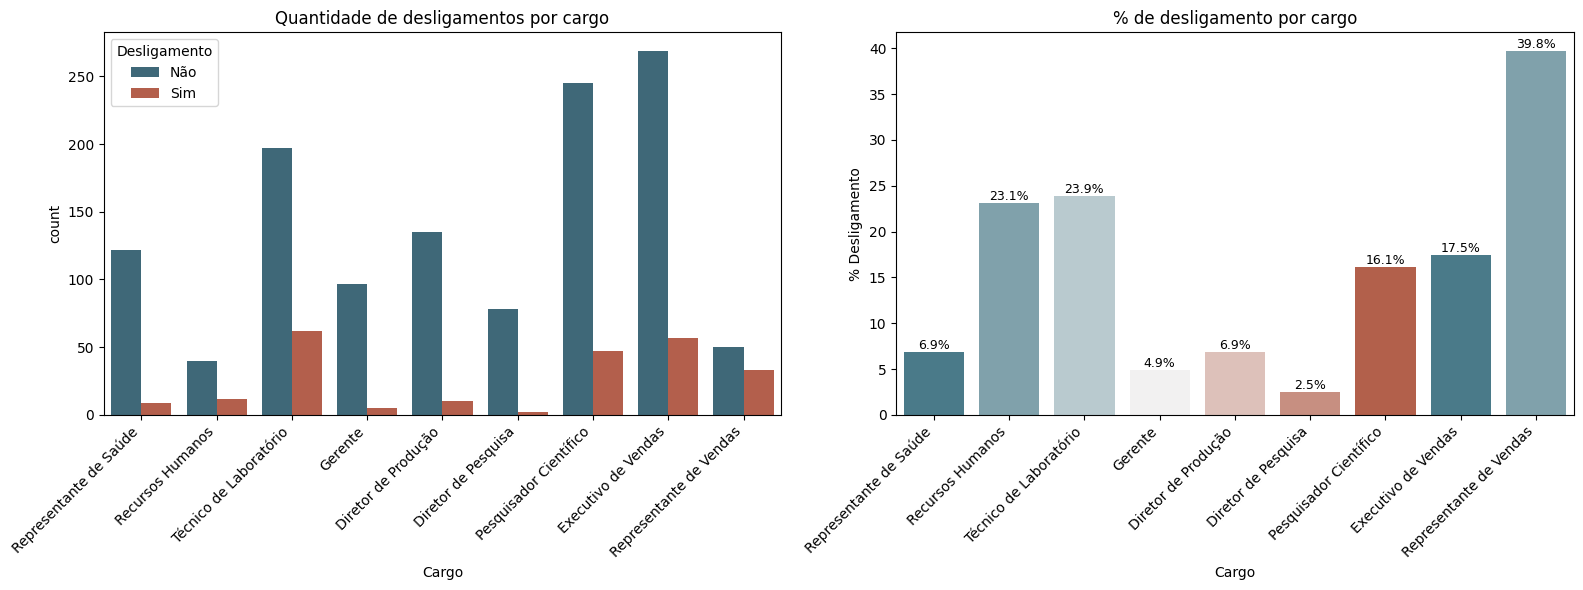

In [ ]:
# Contagem absoluta
abs_cargo = df['Cargo'].value_counts()

# Percentual
taxa_cargo = df.groupby('Cargo')['Desligamento_binario'].mean() * 100

# Tradução
traducao_cargos = {
    'Sales Representative': 'Representante de Vendas',
    'Sales Executive': 'Executivo de Vendas',
    'Research Scientist': 'Pesquisador Científico',
    'Laboratory Technician': 'Técnico de Laboratório',
    'Manager': 'Gerente',
    'Human Resources': 'Recursos Humanos',
    'Healthcare Representative': 'Representante de Saúde',
    'Manufacturing Director': 'Diretor de Produção',
    'Research Director': 'Diretor de Pesquisa'
}

fig = plt.figure(figsize=(16,6))
gs = gridspec.GridSpec(1,2, width_ratios=[1,1])

# Gráfico absoluto
ax0 = plt.subplot(gs[0])
sns.countplot(
    data=df,
    x=df['Cargo'].map(traducao_cargos),
    hue='Desligamento',
    palette=cores, ax=ax0
)
ax0.set_title('Quantidade de desligamentos por cargo')
ax0.set_xlabel('Cargo')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')

# Gráfico percentual
ax1 = plt.subplot(gs[1])
sns.barplot(
    x=taxa_cargo.index.map(traducao_cargos),
    y=taxa_cargo.values,
    palette=default_div, ax=ax1
)
ax1.set_title('% de desligamento por cargo')
ax1.set_ylabel('% Desligamento')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width()/2., p.get_height()),
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<font color='#356d81'> **Cargo:  
O cargo de Representante de Vendas** tem disparadamente a maior taxa de desligamento (**39,8%**).  
**Técnico de Laboratório (23,9%)** e **Recursos Humanos (23,1%)** também apresentam índices elevados.  
Cargos como **Pesquisador Científico (2,5%)** e **Gerente (4,9%)** têm taxas bem menores.  
Esses dados mostram que cargos operacionais e de menor remuneração concentram os maiores índices de desligamento.  


## 2.5 Matriz de Correlação

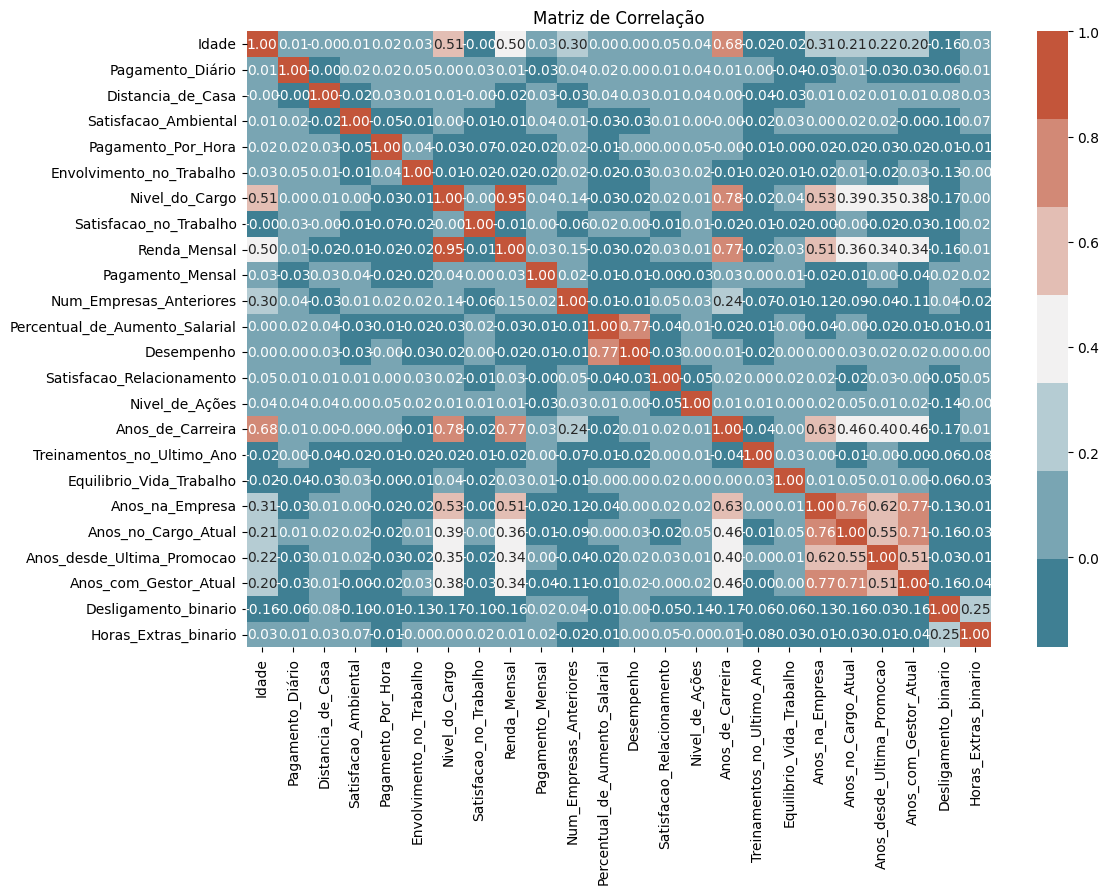

In [ ]:
#Correlação geral
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=default_div, fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

<font color='#356d81'> ***Insight:
A análise da matriz de correlação evidencia os principais fatores relacionados ao desligamento:
Idade (-0,16):** colaboradores mais jovens tendem a pedir desligamento com mais frequência.
**Anos na empresa (-0,31):** há uma concentração de saídas em pessoas com pouco tempo de casa.
**Renda mensal (-0,16):** salários mais baixos aparecem associados ao desligamento.
**Horas extras (+0,25):** reforça que colaboradores com sobrecarga de trabalho estão mais propensos a sair.
Além disso, observamos correlações naturais entre variáveis hierárquicas:
**Nível do cargo** e **Renda mensal (0,59)**;
**Idade** e **Anos na empresa (0,53)**.
Esses insights serão usados para priorizar recomendações e estratégias de retenção.


# 3. Conclusão Final e Recomendações

##  **Conclusão Final**

A análise identificou que o **turnover da empresa está em 16%**, mas com forte concentração em alguns perfis específicos:

1. **Perfis de maior risco:**
   - Colaboradores **jovens (até 35 anos)** têm a maior taxa de desligamento, especialmente entre **18-25 anos (35,8%)**.
   - Funcionários com **até 3 anos de empresa** apresentam taxas até **3x maiores** que os de maior tempo de casa.
   - **Renda baixa** é um fator crítico: taxa de desligamento de **19,7%**, enquanto colaboradores de renda alta têm apenas **3,8%**.
   - **Baixa satisfação no trabalho + horas extras** potencializam o risco, chegando a **35-38%**.

2. **Departamentos e cargos mais críticos:**
   - **Vendas (20,6%)** e **Recursos Humanos (19%)** são os departamentos com maiores taxas de desligamento.
   - Dentro dos cargos, **Representante de Vendas (39,8%)** e **Técnico de Laboratório (23,9%)** lideram em risco.

3. **Cruzamento de fatores:**
   - A combinação de **baixa renda + horas extras + até 3 anos de empresa** gera uma taxa alarmante de **50%** de desligamento.
   - Perfis de **média-baixa renda + horas extras** também apresentam taxas acima de **30%**.




##**Recomendações Estratégicas**

1. **Retenção nos 3 primeiros anos:**
   - Criar um programa estruturado de integração e acompanhamento para novos colaboradores.
   - Implementar **mentoria e planos de carreira claros**, principalmente para jovens e cargos operacionais.

2. **Ajustes de remuneração e benefícios:**
   - Avaliar políticas salariais em cargos com **baixa e média-baixa renda**.
   - Criar **bônus por desempenho e permanência** (ex.: 1, 2 e 3 anos).

3. **Redução de horas extras excessivas:**
   - Identificar setores com sobrecarga de trabalho, especialmente em **Vendas e Laboratório**.
   - Redistribuir demandas ou reforçar equipes para reduzir a dependência de horas extras.

4. **Planos de retenção por cargo e departamento:**
   - Criar um programa específico para **Representantes de Vendas** e **Técnicos de Laboratório**, com incentivos financeiros e melhoria do equilíbrio vida-trabalho.
   - Foco em engajamento para reduzir a alta rotatividade em **Vendas**.

5. **Monitoramento contínuo:**
   - Criar pesquisas de satisfação recorrentes, principalmente para colaboradores de baixa satisfação.
   - Acompanhar mensalmente **indicadores de turnover por perfil** no dashboard, priorizando ações nos grupos mais críticos.

---

 **Impacto esperado:**  
Aplicando essas recomendações, a empresa poderá **reduzir custos com desligamentos e recrutamento**, aumentar o **engajamento e produtividade** e fortalecer a retenção de talentos em áreas-chave.

In [ ]:
# Exportar base final para Excel
df.to_excel("Base_RH_Tratada.xlsx", index=False)
